In [184]:
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import numpy as np
import matplotlib.pyplot as plt
import chipcalibration.ramsey as gordon
from importlib import reload
import qubic.state_disc as sd
import chipcalibration.config as cfg
import qubic.job_manager as jm

In [134]:
qchipname = 'X4Y2'
fpga_config, qchip, channel_config = cfg.load_configs(qchipname)
chanmap = {'Q0':7,'Q2':1,'Q1':4,'Q3':3,'Q4':5,'Q5':6,'Q6':2}

In [162]:
runner = rc.CircuitRunnerClient(ip='192.168.1.247')
jobman = jm.JobManager(fpga_config, qchip, channel_config, runner)

In [149]:
def stack_circuit(n_x90, qubit, amp=None):
    if amp is None:
        amp = qchip.gates['{}X90'.format(qubit)].contents[0].amp
    circuit = [{'name': 'delay', 't': 400.e-6}]
    for i in range(n_x90):
        circuit.append({'name': 'X90', 'qubit':[qubit], 'modi': {(0, 'amp'): amp}})
    circuit.append({'name': 'read', 'qubit': [qubit]})
    return circuit
z_circuit = [
    {'name': 'delay', 't': 400.e-6},
    {'name': 'X90', 'qubit':['Q2']},
    {'name': 'Z90', 'qubit':['Q2']},
    {'name': 'Z90', 'qubit':['Q2']},
    {'name': 'X90', 'qubit':['Q2']},
    {'name': 'read', 'qubit': ['Q2']}
    
]

In [174]:
qubit = 'Q3'
#tc.run_assemble_stage(tc.run_compile_stage(stack_circuit(8), fpga_config, qchip), channel_config)
shots_out = jobman.build_and_run_circuits([stack_circuit(2, qubit)], 1000, outputs=['shots'], fit_gmm=False)['shots']

In [175]:
#np.sum(shots_out['Q3'])
#jobman.gmm_manager.set_labels_maxtomin(shots_out, [1, 0])


159

In [180]:
nones = []
amps = np.linspace(0.135, 0.16, 30)
for amp in amps:
    shots_out = jobman.build_and_run_circuits([stack_circuit(30, qubit, amp)], 
                                                     1000, outputs=['shots'], fit_gmm=False)['shots']
    nones.append(np.sum(shots_out['Q3']))

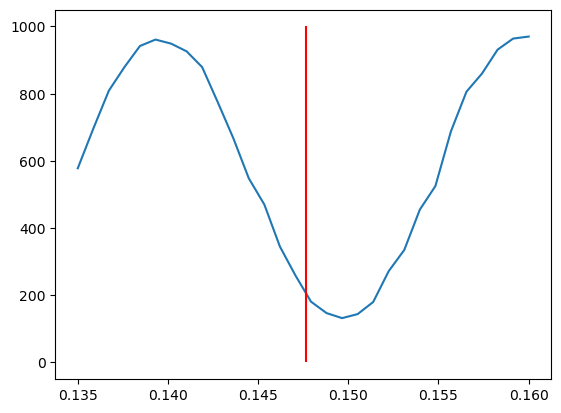

In [181]:
plt.plot(amps, nones)
plt.vlines(qchip.gates['Q3X90'].contents[0].amp, 0, 1000, colors='r')

In [182]:
amps[np.argmin(nones)]

0.1496551724137931

In [121]:
shots_out = jobman.build_and_run_circuits([z_circuit], 1000, outputs=['shots'])['shots']

In [122]:
np.sum(shots_out['Q2'])

103